In [1]:
import numpy as np
import cv2 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

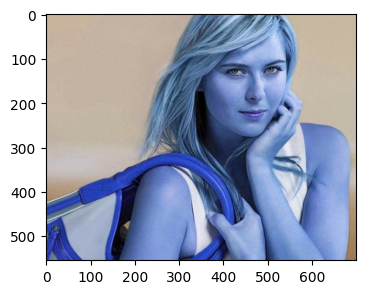

In [3]:
plt.figure(figsize = (4, 6))
plt.imshow(img)

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(555, 700)

In [5]:
img_gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], shape=(555, 700), dtype=uint8)

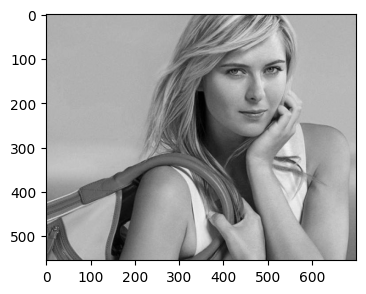

In [6]:
plt.figure(figsize = (4, 6))
plt.imshow(img_gray, cmap = 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier('openCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('openCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

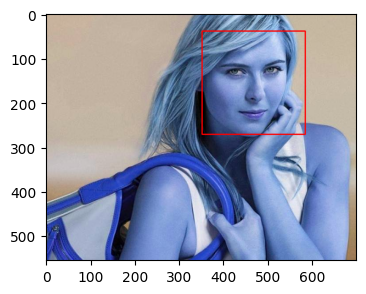

In [9]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.figure(figsize = (4, 6))
plt.imshow(face_img)

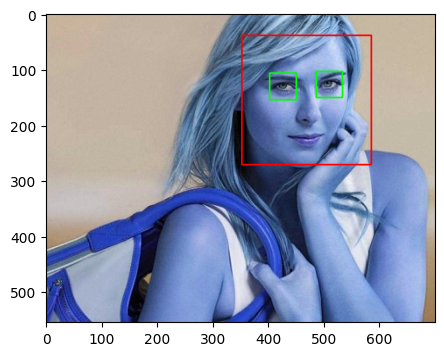

In [10]:
cv2.destroyAllWindows()

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure(figsize = (6, 4))
plt.imshow(face_img, cmap='gray')
plt.show()

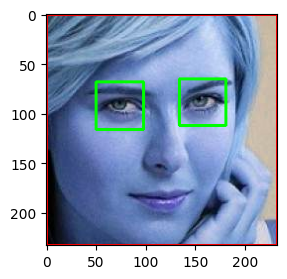

In [11]:
%matplotlib inline
plt.figure(figsize = (3, 3))
plt.imshow(roi_color)

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
            

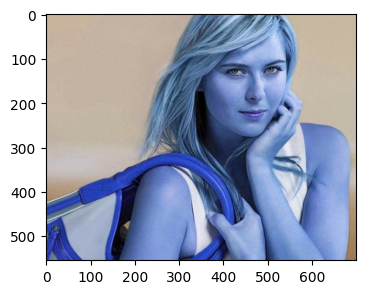

In [13]:
original_image = cv2.imread('test_images/sharapova1.jpg')
plt.figure(figsize = (4, 4))
plt.imshow(original_image)

<Figure size 300x300 with 0 Axes>

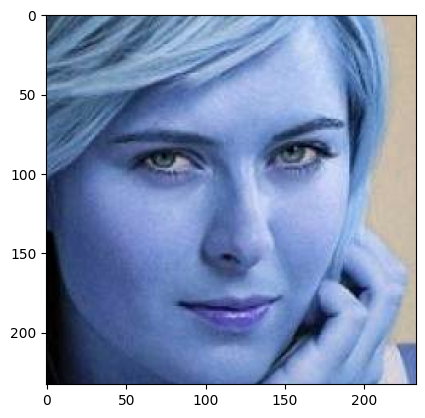

<Figure size 300x300 with 0 Axes>

In [14]:
cropped_image = get_cropped_image_if_2_eyes('test_images/sharapova1.jpg')
plt.imshow(cropped_image)
plt.figure(figsize = (3, 3))

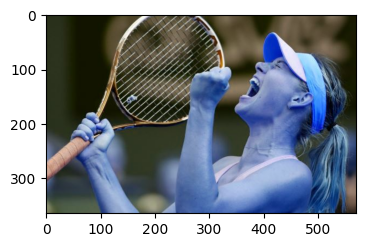

In [15]:
original_img_obstructed = cv2.imread('test_images/sharapova2.jpg')
plt.figure(figsize = (4, 4))
plt.imshow(original_img_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = './dataset/'
path_to_cr_data = './dataset.cropped/' 

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

img_dirs = [d for d in img_dirs if d.split('/')[-1].lower() != "cropped"]

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder : ', cropped_folder)

            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [20]:
import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
   
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

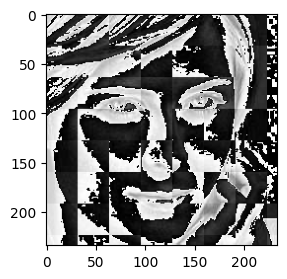

In [21]:
im_har = w2d(cropped_image,'db1',5)
plt.figure(figsize = (3, 3))
plt.imshow(im_har, cmap='gray')

In [22]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/lionel_messi/lionel_messi1.png',
  './dataset/lionel_messi/lionel_messi2.png',
  './dataset/lionel_messi/lionel_messi3.png',
  './dataset/lionel_messi/lionel_messi4.png',
  './dataset/lionel_messi/lionel_messi5.png',
  './dataset/lionel_messi/lionel_messi6.png',
  './dataset/lionel_messi/lionel_messi7.png',
  './dataset/lionel_messi/lionel_messi8.png',
  './dataset/lionel_messi/lionel_messi9.png',
  './dataset/lionel_messi/lionel_messi10.png',
  './dataset/lionel_messi/lionel_messi11.png',
  './dataset/lionel_messi/lionel_messi12.png',
  './dataset/lionel_messi/lionel_messi13.png',
  './dataset/lionel_messi/lionel_messi14.png',
  './dataset/lionel_messi/lionel_messi15.png',
  './dataset/lionel_messi/lionel_messi16.png',
  './dataset/lionel_messi/lionel_messi17.png',
  './dataset/lionel_messi/lionel_messi18.png',
  './dataset/lionel_messi/lionel_messi19.png',
  './dataset/lionel_messi/lionel_messi20.png',
  './dataset/lionel_messi/lionel_messi21.png',
  './d

In [23]:
class_dict = {}

In [24]:
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [26]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(328, 4096)

In [27]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.], shape=(4096,))

Model Building

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8292682926829268

In [45]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [47]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\HP\myworld\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\myworld\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\HP\myworld\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\myworld\Lib\site-packages\sklearn\linear_model\_logist

,model,best_score,best_params
0,svm,0.853959,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.691265,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.845796,{'logisticregression__C': 1}


In [49]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8292682926829268

In [50]:
best_estimators['random_forest'].score(X_test,y_test)


0.5609756097560976

In [52]:
best_estimators['svm'].score(X_test, y_test)

0.7926829268292683

In [54]:
best_clf = best_estimators['svm']

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  1,  0,  3,  4],
       [ 0, 14,  0,  2,  0],
       [ 0,  0,  8,  4,  0],
       [ 0,  1,  0, 16,  1],
       [ 0,  1,  0,  0, 12]])

Text(95.72222222222221, 0.5, 'Truth')

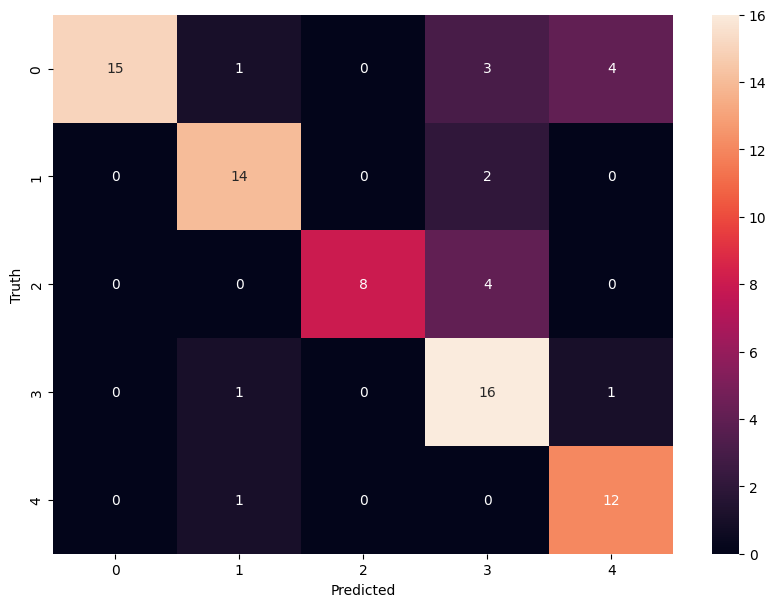

In [56]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [58]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [59]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))